In [1]:
# Copyright 2023 Regeneron Pharmaceuticals Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Notebook to plot TCR clustering timing benchmarking 
- First load timning results computed in /comparitor_tooling/timing/timing.py


In [2]:
import pandas as pd
import numpy as np

from tcrvalid.plot_utils import set_simple_rc_params

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk',palette='bright')
set_simple_rc_params()

In [3]:
df_d = pd.read_csv('../results_data/timings/pairwise_data.csv')
df_c = pd.read_csv('../results_data/timings/cluster_data.csv')
df_c_clustcr = pd.read_csv('../results_data/timings/clustcr_cluster_timing.csv')

In [4]:
colorblind = sns.color_palette("muted", 10)
method_colors = {
    'tcrdist' : colorblind[0],
    'ismart': colorblind[1],
    'tcrvalid':colorblind[2],
    'tcrvalid: pre embedded':'springgreen',
    'tcrvalid: only embedding':'forestgreen',
    'clustcr':colorblind[6],
    'levenshtein':'k'
}

### Plot decomposing elements of TCR-VALID clustering
- embedding/clustering only/ combination

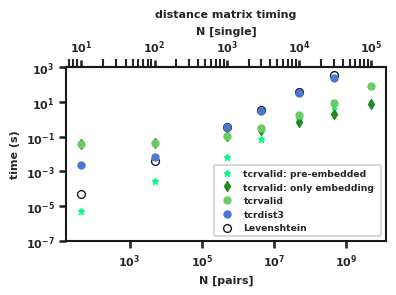

In [5]:
# plot methods timing for distance matrix

f,ax = plt.subplots(1,1,figsize=(4,3))

ms_size=5

ns = df_d.n

ax.plot(ns*(ns-1)*0.5,df_d['time_tcrvalid_pre-embedded'],
        color=method_colors['tcrvalid: pre embedded'],
        marker='*',
        ms=ms_size,
        lw=0,
        label='tcrvalid: pre-embedded'
)
ax.plot(ns*(ns-1)*0.5,df_d['time_tcrvalid_only-embedding'],
        color=method_colors['tcrvalid: only embedding'],
        marker='d',
        ms=ms_size,
        lw=0,
        label='tcrvalid: only embedding '
)
ax.plot(ns*(ns-1)*0.5,df_d['time_tcrvalid_incl-embed'],
        color=method_colors['tcrvalid'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='tcrvalid'
)

ax.plot(ns*(ns-1)*0.5,df_d['time_tcrdist3'],
        color=method_colors['tcrdist'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='tcrdist3'
)
ax.scatter(ns*(ns-1)*0.5,df_d['time_levenshtein'],
        facecolors='w',
        edgecolor=method_colors['levenshtein'],
        marker='o',
        s=0.4*ms_size**2*np.pi,
        lw=1,
        label='Levenshtein'
)

ax.set_xlabel('N [pairs]')
ax.set_ylabel('time (s)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()


f_fun = lambda x: 0.5*(1+np.sqrt(1+8*x))
b_fun = lambda x: x*(x-1)/2

secax = ax.secondary_xaxis('top', functions=(f_fun,b_fun))
secax.set_xlabel('N [single]')

ax.set_ylim([1e-7,1e3])

plt.title('distance matrix timing')
plt.tight_layout()

plt.savefig('../results_data/timings/pairwise.png')
plt.savefig('../results_data/timings/pairwise.pdf')

### Plot to compare TCR-VALID vs iSMART/clusTCR

In [6]:
df_cl = df_c.merge(df_c_clustcr.drop(columns=['pair']),on='n')

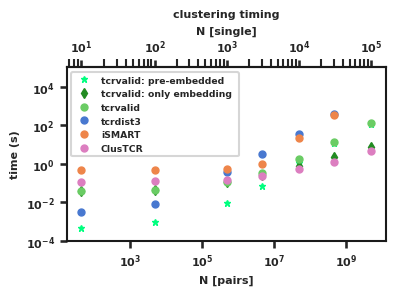

In [7]:
f,ax = plt.subplots(1,1,figsize=(4,3))

ms_size=5

ns = df_d.n

ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_pre-embedded'],
        color=method_colors['tcrvalid: pre embedded'],
        marker='*',
        ms=ms_size,
        lw=0,
        label='tcrvalid: pre-embedded'
)


ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_only-embedding'],
        color=method_colors['tcrvalid: only embedding'],
        marker='d',
        ms=ms_size,
        lw=0,
        label='tcrvalid: only embedding '
)

ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_incl-embed'],
        color=method_colors['tcrvalid'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='tcrvalid'
)

ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrdist3'],
        color=method_colors['tcrdist'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='tcrdist3'
)

ax.plot(ns*(ns-1)*0.5,df_cl['time_ismart'],
        color=method_colors['ismart'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='iSMART'
)

ax.plot(ns*(ns-1)*0.5,df_cl['time_clustcr'],
        color=method_colors['clustcr'],
        marker='o',
        ms=ms_size,
        lw=0,
        label='ClusTCR'
)

ax.set_xlabel('N [pairs]')
ax.set_ylabel('time (s)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()


f_fun = lambda x: 0.5*(1+np.sqrt(1+8*x))
b_fun = lambda x: x*(x-1)/2

secax = ax.secondary_xaxis('top', functions=(f_fun,b_fun))
secax.set_xlabel('N [single]')

ax.set_ylim([1e-4, 1e5])

plt.title('clustering timing')
plt.tight_layout()

plt.savefig('../results_data/timings/cluster.png')
plt.savefig('../results_data/timings/cluster.pdf')

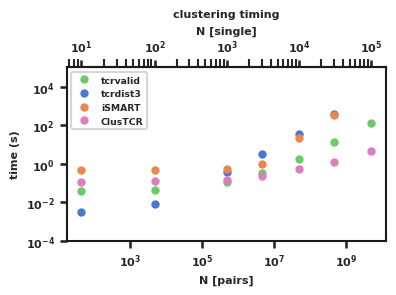

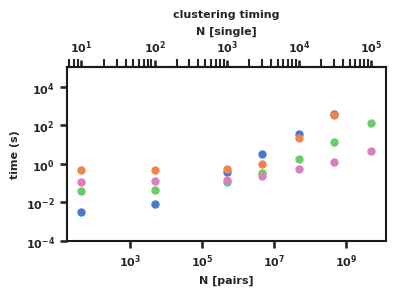

In [8]:
for with_leg in [True,False]:
    f,ax = plt.subplots(1,1,figsize=(4,3))

    ms_size=5

    ns = df_d.n

    # ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_pre-embedded'],
    #         color=method_colors['tcrvalid: pre embedded'],
    #         marker='*',
    #         ms=ms_size,
    #         lw=0,
    #         label='tcrvalid: pre-embedded'
    # )


    # ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_only-embedding'],
    #         color=method_colors['tcrvalid: only embedding'],
    #         marker='d',
    #         ms=ms_size,
    #         lw=0,
    #         label='tcrvalid: only embedding '
    # )

    ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrvalid_incl-embed'],
            color=method_colors['tcrvalid'],
            marker='o',
            ms=ms_size,
            lw=0,
            label='tcrvalid'
    )

    ax.plot(ns*(ns-1)*0.5,df_cl['time_tcrdist3'],
            color=method_colors['tcrdist'],
            marker='o',
            ms=ms_size,
            lw=0,
            label='tcrdist3'
    )

    ax.plot(ns*(ns-1)*0.5,df_cl['time_ismart'],
            color=method_colors['ismart'],
            marker='o',
            ms=ms_size,
            lw=0,
            label='iSMART'
    )

    ax.plot(ns*(ns-1)*0.5,df_cl['time_clustcr'],
            color=method_colors['clustcr'],
            marker='o',
            ms=ms_size,
            lw=0,
            label='ClusTCR'
    )

    ax.set_xlabel('N [pairs]')
    ax.set_ylabel('time (s)')

    ax.set_xscale('log')
    ax.set_yscale('log')
    if with_leg:
        ax.legend()


    f_fun = lambda x: 0.5*(1+np.sqrt(1+8*x))
    b_fun = lambda x: x*(x-1)/2

    secax = ax.secondary_xaxis('top', functions=(f_fun,b_fun))
    secax.set_xlabel('N [single]')

    ax.set_ylim([1e-4, 1e5])

    plt.title('clustering timing')
    plt.tight_layout()

    plt.savefig('../results_data/timings/cluster_minimal_leg_{}.png'.format(with_leg))
    plt.savefig('../results_data/timings/cluster_minimal_leg_{}.pdf'.format(with_leg))

### Clustering component timings

In [9]:
df_tv = df_d[[
    'n',
    'time_tcrvalid_pre-embedded',
    'time_tcrvalid_only-embedding',
    'time_tcrvalid_incl-embed'
]].merge(
    df_c[[
        'n',
        'time_tcrvalid_pre-embedded',
        'time_tcrvalid_only-embedding',
        'time_tcrvalid_incl-embed'
    ]],
    on='n',
    suffixes=['_distance','_cluster']
)

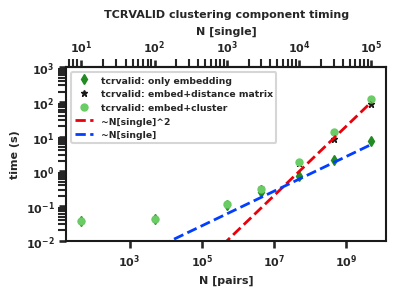

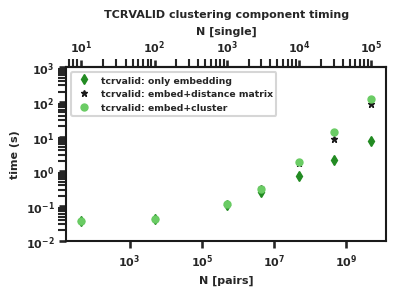

In [10]:
for orders in [True,False]:
    f,ax = plt.subplots(1,1,figsize=(4,3))

    ms_size=5

    ns = df_d.n


    ax.plot(ns*(ns-1)*0.5,
            df_tv['time_tcrvalid_only-embedding_cluster'],
            color=method_colors['tcrvalid: only embedding'],
            marker='d',
            ms=ms_size,
            lw=0,
            label='tcrvalid: only embedding '
    )

    ax.plot(ns*(ns-1)*0.5,
            df_tv['time_tcrvalid_incl-embed_distance'],
            color='k', #method_colors['tcrvalid'],
            marker='*',
            lw=0,
            ms=ms_size,
            label='tcrvalid: embed+distance matrix'
    )

    ax.plot(ns*(ns-1)*0.5,
            df_tv['time_tcrvalid_incl-embed_cluster'],
            color=method_colors['tcrvalid'],
            marker='o',
            lw=0,
            ms=ms_size,
            label='tcrvalid: embed+cluster '
    )
    nn=np.squeeze(ns*(ns-1)*0.5)

    if orders:
        ax.plot(
            nn,
            1e-8*ns**2,
            'r--',
            label='~N[single]^2'
        )
        ax.plot(
            nn,
            6e-5*ns,
            'b--',
            label='~N[single]'
        )


    ax.set_xlabel('N [pairs]')
    ax.set_ylabel('time (s)')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()


    f_fun = lambda x: 0.5*(1+np.sqrt(1+8*x))
    b_fun = lambda x: x*(x-1)/2

    secax = ax.secondary_xaxis('top', functions=(f_fun,b_fun))
    secax.set_xlabel('N [single]')

    ax.set_ylim([1e-2, 1e3])

    plt.title('TCRVALID clustering component timing')
    plt.tight_layout()

    plt.savefig('../results_data/timings/components_hasorders_{}.png'.format(orders))
    plt.savefig('../results_data/timings/components_hasorders_{}.pdf'.format(orders))